<a href="https://colab.research.google.com/github/onewon1234/AIDeepLearning/blob/main/chapter05_fundamentals_of_ml_i%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This is a companion notebook for the book [Deep Learning with Python, Second Edition](https://www.manning.com/books/deep-learning-with-python-second-edition?a_aid=keras&a_bid=76564dff). For readability, it only contains runnable code blocks and section titles, and omits everything else in the book: text paragraphs, figures, and pseudocode.

**If you want to be able to follow what's going on, I recommend reading the notebook side by side with your copy of the book.**

This notebook was generated for TensorFlow 2.6.

# Fundamentals of machine learning

## Generalization: The goal of machine learning

### Underfitting and overfitting

#### Noisy training data

#### Ambiguous features

#### Rare features and spurious correlations

**Adding white-noise channels or all-zeros channels to MNIST**

In [1]:
from tensorflow.keras.datasets import mnist
import numpy as np

(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

train_images_with_noise_channels = np.concatenate(
    [train_images, np.random.random((len(train_images), 784))], axis=1)

train_images_with_zeros_channels = np.concatenate(
    [train_images, np.zeros((len(train_images), 784))], axis=1)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
train_images.shape

(60000, 784)

In [6]:
train_images_with_noise_channels.shape

(60000, 1568)

**Training the same model on MNIST data with noise channels or all-zero channels**

In [7]:
from tensorflow import keras
from tensorflow.keras import layers

def get_model():
    model = keras.Sequential([
        layers.Dense(512, activation="relu"),
        layers.Dense(10, activation="softmax")
    ])
    model.compile(optimizer="rmsprop",
                  loss="sparse_categorical_crossentropy",
                  metrics=["accuracy"])
    return model

model = get_model()
history_noise = model.fit(
    train_images_with_noise_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

model = get_model()
history_zeros = model.fit(
    train_images_with_zeros_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.6916 - loss: 1.1109 - val_accuracy: 0.9200 - val_loss: 0.2675
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.9134 - loss: 0.2816 - val_accuracy: 0.9413 - val_loss: 0.2020
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9438 - loss: 0.1768 - val_accuracy: 0.9512 - val_loss: 0.1613
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9613 - loss: 0.1252 - val_accuracy: 0.9583 - val_loss: 0.1390
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9723 - loss: 0.0912 - val_accuracy: 0.9605 - val_loss: 0.1338
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9789 - loss: 0.0685 - val_accuracy: 0.9607 - val_loss: 0.1342
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.9841 - loss: 0.0508 - val_accuracy: 0.9622 - val_loss: 0.1286
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9892 - loss: 0.0353 - val_accu

**Plotting a validation accuracy comparison**

In [16]:
model = get_model()
history_ori = model.fit(
    train_images, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.1038 - loss: 2.3336 - val_accuracy: 0.1089 - val_loss: 2.3068
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.1177 - loss: 2.2972 - val_accuracy: 0.1011 - val_loss: 2.3119
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.1300 - loss: 2.2873 - val_accuracy: 0.1072 - val_loss: 2.3154
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.1461 - loss: 2.2735 - val_accuracy: 0.1047 - val_loss: 2.3238
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.1554 - loss: 2.2553 - val_accuracy: 0.1032 - val_loss: 2.3347
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.1744 - loss: 2.2351 - val_accuracy: 0.1053 - val_loss: 2.3449
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.1862 - loss: 2.2114 - val_accuracy: 0.1024 - val_loss: 2.3612
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.2030 - loss: 2.1810 - val_accuracy: 0.

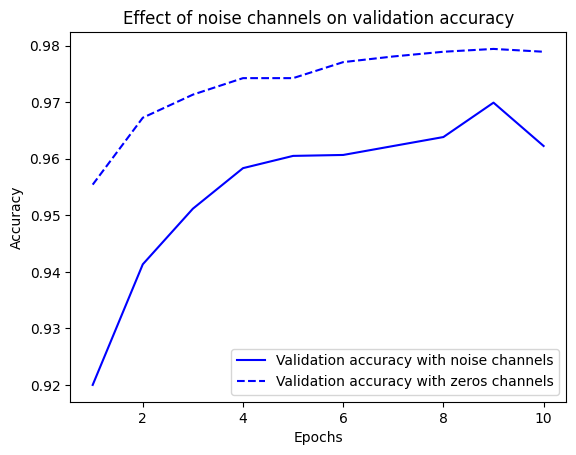

In [19]:
import matplotlib.pyplot as plt
val_acc_noise = history_noise.history["val_accuracy"]
val_acc_zeros = history_zeros.history["val_accuracy"]
epochs = range(1, 11)
plt.plot(epochs, val_acc_noise, "b-",
         label="Validation accuracy with noise channels")
plt.plot(epochs, val_acc_zeros, "b--",
         label="Validation accuracy with zeros channels")
plt.title("Effect of noise channels on validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

#(결과분석) val_acc_zeros가 val_acc_noise 보다 정확도가 좋음

### The nature of generalization in deep learning

**Fitting a MNIST model with randomly shuffled labels**

In [13]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

random_train_labels = train_labels[:]
np.random.shuffle(random_train_labels)

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, random_train_labels,
          epochs=100,
          batch_size=128,
          validation_split=0.2)

Epoch 1/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.1034 - loss: 2.3331 - val_accuracy: 0.1077 - val_loss: 2.3068
Epoch 2/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.1206 - loss: 2.2970 - val_accuracy: 0.1023 - val_loss: 2.3104
Epoch 3/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.1296 - loss: 2.2885 - val_accuracy: 0.1002 - val_loss: 2.3169
Epoch 4/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.1399 - loss: 2.2752 - val_accuracy: 0.1013 - val_loss: 2.3229
Epoch 5/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.1539 - loss: 2.2598 - val_accuracy: 0.1059 - val_loss: 2.3352
Epoch 6/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.1730 - loss: 2.2402 - val_accuracy: 0.1055 - val_loss: 2.3432
Epoch 7/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.1861 - loss: 2.2124 - val_accuracy: 0.1058 - val_loss: 2.3527
Epoch 8/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.2038 - loss: 2.1857 - val_accu

#### The manifold hypothesis

#### Interpolation as a source of generalization

#### Why deep learning works

#### Training data is paramount

## Evaluating machine-learning models

### Training, validation, and test sets

#### Simple hold-out validation

#### K-fold validation

#### Iterated K-fold validation with shuffling

### Beating a common-sense baseline

### Things to keep in mind about model evaluation

## Improving model fit

### Tuning key gradient descent parameters

**Training a MNIST model with an incorrectly high learning rate**

In [20]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer=keras.optimizers.RMSprop(1.),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2)

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.4341 - loss: 2508.0601 - val_accuracy: 0.2110 - val_loss: 3.2234
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.2118 - loss: 3.9111 - val_accuracy: 0.1387 - val_loss: 2.2952
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.1610 - loss: 2.6246 - val_accuracy: 0.1394 - val_loss: 2.4178
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.1591 - loss: 2.5684 - val_accuracy: 0.2149 - val_loss: 2.1739
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.2015 - loss: 2.3500 - val_accuracy: 0.2375 - val_loss: 2.3184
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.2171 - loss: 2.7284 - val_accuracy: 0.2028 - val_loss: 2.0812
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.1810 - loss: 2.5574 - val_accuracy: 0.1536 - val_loss: 2.2231
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.1979 - loss: 2.3641 - val_accuracy:

**The same model with a more appropriate learning rate**

In [21]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer=keras.optimizers.RMSprop(1e-2),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2)

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8347 - loss: 0.7793 - val_accuracy: 0.9514 - val_loss: 0.1673
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9633 - loss: 0.1267 - val_accuracy: 0.9647 - val_loss: 0.1337
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9764 - loss: 0.0878 - val_accuracy: 0.9628 - val_loss: 0.1592
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9793 - loss: 0.0744 - val_accuracy: 0.9628 - val_loss: 0.1647
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9845 - loss: 0.0596 - val_accuracy: 0.9649 - val_loss: 0.2006
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9857 - loss: 0.0578 - val_accuracy: 0.9715 - val_loss: 0.1670
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9887 - loss: 0.0456 - val_accuracy: 0.9739 - val_loss: 0.1843
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9886 - loss: 0.0482 - val_accuracy: 0.

### Leveraging better architecture priors

### Increasing model capacity

**A simple logistic regression on MNIST**

In [22]:
model = keras.Sequential([layers.Dense(10, activation="softmax")])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_small_model = model.fit(
    train_images, train_labels,
    epochs=20,
    batch_size=128,
    validation_split=0.2)

Epoch 1/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7394 - loss: 1.0249 - val_accuracy: 0.9050 - val_loss: 0.3599
Epoch 2/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9019 - loss: 0.3625 - val_accuracy: 0.9128 - val_loss: 0.3103
Epoch 3/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9111 - loss: 0.3202 - val_accuracy: 0.9178 - val_loss: 0.2925
Epoch 4/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9164 - loss: 0.3033 - val_accuracy: 0.9210 - val_loss: 0.2833
Epoch 5/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9176 - loss: 0.2972 - val_accuracy: 0.9236 - val_loss: 0.2770
Epoch 6/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9186 - loss: 0.2860 - val_accuracy: 0.9252 - val_loss: 0.2733
Epoch 7/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9224 - loss: 0.2809 - val_accuracy: 0.9247 - val_loss: 0.2728
Epoch 8/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9242 - loss: 0.2735 - val_accuracy: 0.

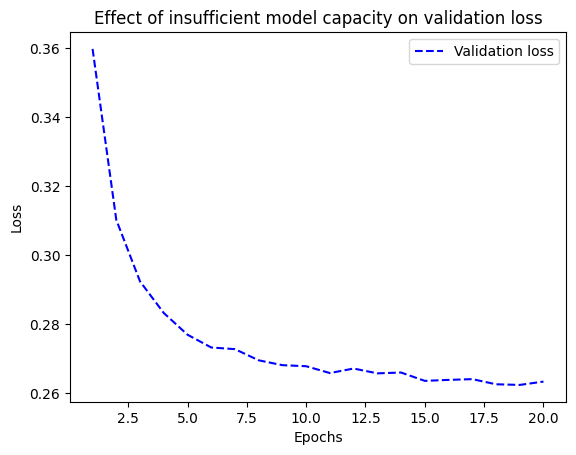

In [23]:
import matplotlib.pyplot as plt
val_loss = history_small_model.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, val_loss, "b--",
         label="Validation loss")
plt.title("Effect of insufficient model capacity on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

#(결과분석) 과적합은 없지만 loss가 0.26아래로 안 내려감

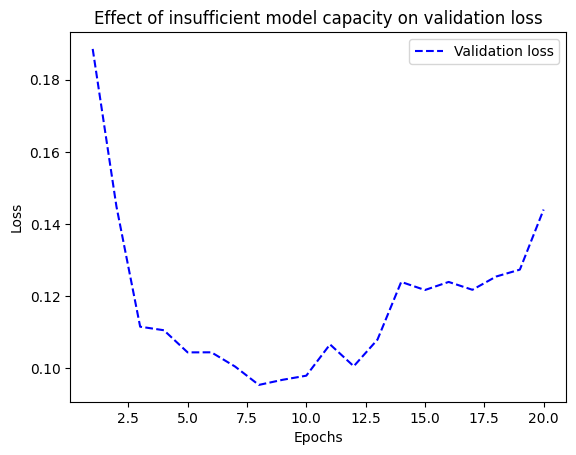

In [28]:
import matplotlib.pyplot as plt
val_loss = history_large_model.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, val_loss, "b--",
         label="Validation loss")
plt.title("Effect of insufficient model capacity on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

#(결과분석) 그래프가 들쑥날쑥하고 과적합은 좀 발생하지만 loss가 0.1로 내려간다는 점에서 앞의 small_model 보다 좋음.

## Improving generalization

### Dataset curation

### Feature engineering

### Using early stopping

### Regularizing your model

#### Reducing the network's size

**Original model**

In [25]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), _ = imdb.load_data(num_words=10000)

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
train_data = vectorize_sequences(train_data)

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_original = model.fit(train_data, train_labels,
                             epochs=20, batch_size=512, validation_split=0.4)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - accuracy: 0.6088 - loss: 0.6421 - val_accuracy: 0.8134 - val_loss: 0.4608
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.8819 - loss: 0.3891 - val_accuracy: 0.8844 - val_loss: 0.3340
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.9176 - loss: 0.2761 - val_accuracy: 0.8890 - val_loss: 0.2934
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.9356 - loss: 0.2110 - val_accuracy: 0.8904 - val_loss: 0.2774
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.9481 - loss: 0.1732 - val_accuracy: 0.8892 - val_loss: 0.2750
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.9541 - loss: 0.1477 - val_accuracy: 0.8876 - val_loss: 0.2834
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.9622 - loss: 0.1281 - val_accuracy: 0.8848 - val_loss: 0.2967
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accurac

**Version of the model with lower capacity**

In [26]:
model = keras.Sequential([
    layers.Dense(4, activation="relu"),
    layers.Dense(4, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_smaller_model = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.5709 - loss: 0.6597 - val_accuracy: 0.6680 - val_loss: 0.5882
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.7363 - loss: 0.5564 - val_accuracy: 0.7705 - val_loss: 0.5387
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.8221 - loss: 0.5047 - val_accuracy: 0.7559 - val_loss: 0.5218
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.8563 - loss: 0.4730 - val_accuracy: 0.8510 - val_loss: 0.4883
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.8944 - loss: 0.4380 - val_accuracy: 0.8448 - val_loss: 0.4775
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9110 - loss: 0.4170 - val_accuracy: 0.8599 - val_loss: 0.4656
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9279 - loss: 0.3936 - val_accuracy: 0.8624 - val_loss: 0.4619
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9381 - loss: 0.3768 - val_accuracy: 0.8750 - v

**Version of the model with higher capacity**

In [27]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(512, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_larger_model = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 8s 252ms/step - accuracy: 0.6365 - loss: 0.6510 - val_accuracy: 0.8455 - val_loss: 0.3736
Epoch 2/20


KeyboardInterrupt: 

#### Adding weight regularization

**Adding L2 weight regularization to the model**
- 과적합을 막기 위한 정규화 기법
- 가중치를 작게 만드는 페널티 부여하며 손실함수에 적용됨

In [29]:
from tensorflow.keras import regularizers
model = keras.Sequential([
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.002),   #W와 b를 0.002의 constant parameter로 제한해서 너무 커지지 않도록 제한함
                 activation="relu"),
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.002),
                 activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_l2_reg = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)   #validation_split: training 데이터의 40%를 validation으로 사용

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.6572 - loss: 0.7112 - val_accuracy: 0.8160 - val_loss: 0.5371
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.8823 - loss: 0.4788 - val_accuracy: 0.8783 - val_loss: 0.4271
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.9153 - loss: 0.3751 - val_accuracy: 0.8893 - val_loss: 0.3807
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.9283 - loss: 0.3151 - val_accuracy: 0.8874 - val_loss: 0.3732
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.9386 - loss: 0.2836 - val_accuracy: 0.8897 - val_loss: 0.3620
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.9442 - loss: 0.2643 - val_accuracy: 0.8880 - val_loss: 0.3628
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.9484 - loss: 0.2500 - val_accuracy: 0.8832 - val_loss: 0.3722
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.9504 - loss: 0.2409 - val_accuracy: 0.8837 - v

**Different weight regularizers available in Keras**

In [30]:
from tensorflow.keras import regularizers
regularizers.l1(0.001)
regularizers.l1_l2(l1=0.001, l2=0.001)

#### Adding dropout

**Adding dropout to the IMDB model**

- L2보다 dropout을 딥러닝에서는 더 추천!!
- 학습 중 무작위로 뉴런을 끔(비활성화)으로써 뉴런의 상호 의존(co-adaptation)을 줄여줌
- 학습 중에 매번 다른 서브모델을 학습하게 만듦
- 비선형 특성의 모델 학습에 적합


In [31]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_dropout = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - accuracy: 0.6007 - loss: 0.6574 - val_accuracy: 0.8513 - val_loss: 0.5060
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.7655 - loss: 0.5255 - val_accuracy: 0.8627 - val_loss: 0.4125
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.8223 - loss: 0.4415 - val_accuracy: 0.8800 - val_loss: 0.3434
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.8622 - loss: 0.3733 - val_accuracy: 0.8848 - val_loss: 0.3038
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.8858 - loss: 0.3214 - val_accuracy: 0.8882 - val_loss: 0.2849
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.9065 - loss: 0.2744 - val_accuracy: 0.8908 - val_loss: 0.2742
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.9174 - loss: 0.2468 - val_accuracy: 0.8784 - val_loss: 0.3064
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.9270 - loss: 0.2250 - val_accuracy: 0.8908 - v

## Summary